# **BAGGING**

Defination: Bagging, short for Bootstrap Aggregating, is an ensemble learning technique that combines multiple models to improve accuracy, stability, and reduce variance. It’s particularly useful for unstable models like decision trees, neural networks, and subset selection in linear regression.

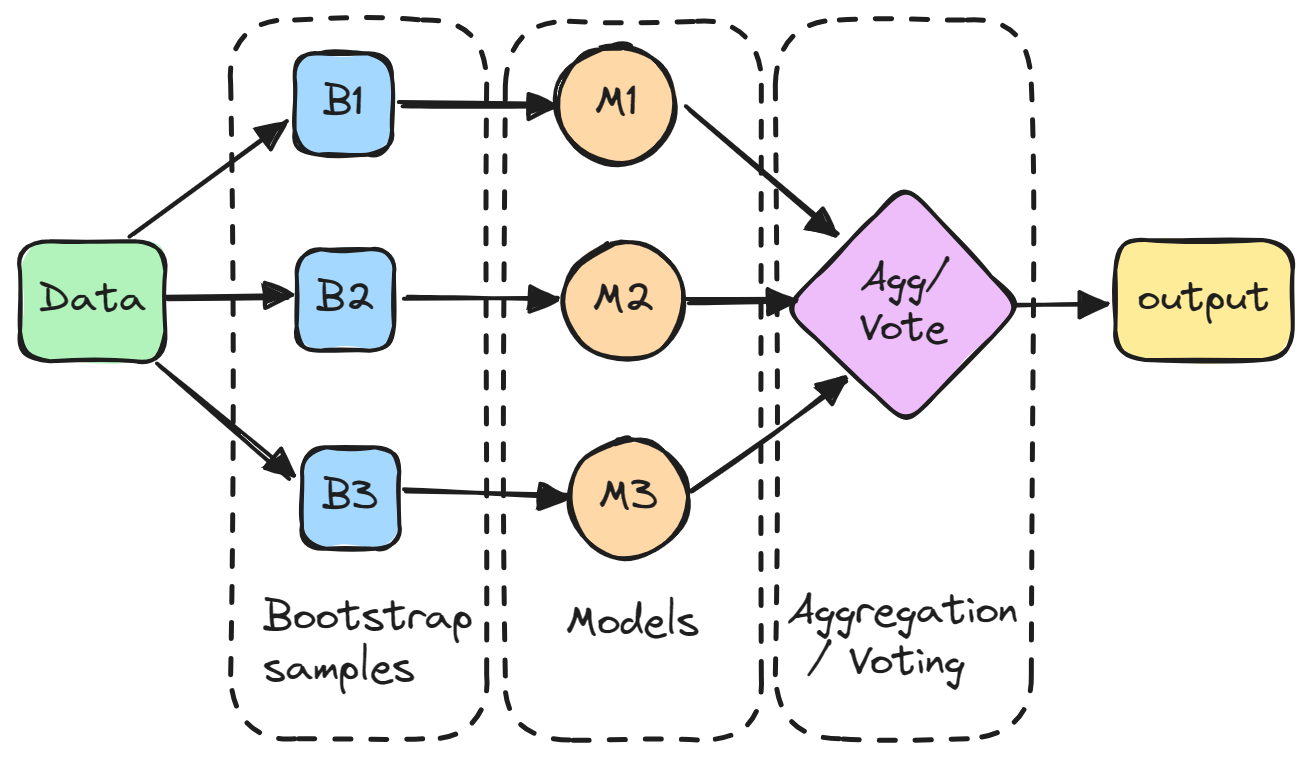

Steps:
- Randomly sampling the training data with replacement to create multiple subsets.
- Training a model (e.g., decision tree, linear regression) on each subset.
- Aggregating the predictions from each model to produce a final prediction.

Key Takeaways

- Bagging reduces variance and improves model stability by combining multiple models.
- It’s particularly effective for unstable models and can be used for classification and regression tasks.
- Python libraries like scikit-learn and PySpark MLlib provide implementations of bagging.

### Importing Required Modules

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor

### Loading Dataset

In [107]:
dataset = load_iris(as_frame = True)
df = dataset.data
df['Species'] = dataset.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Plotting Pairplot

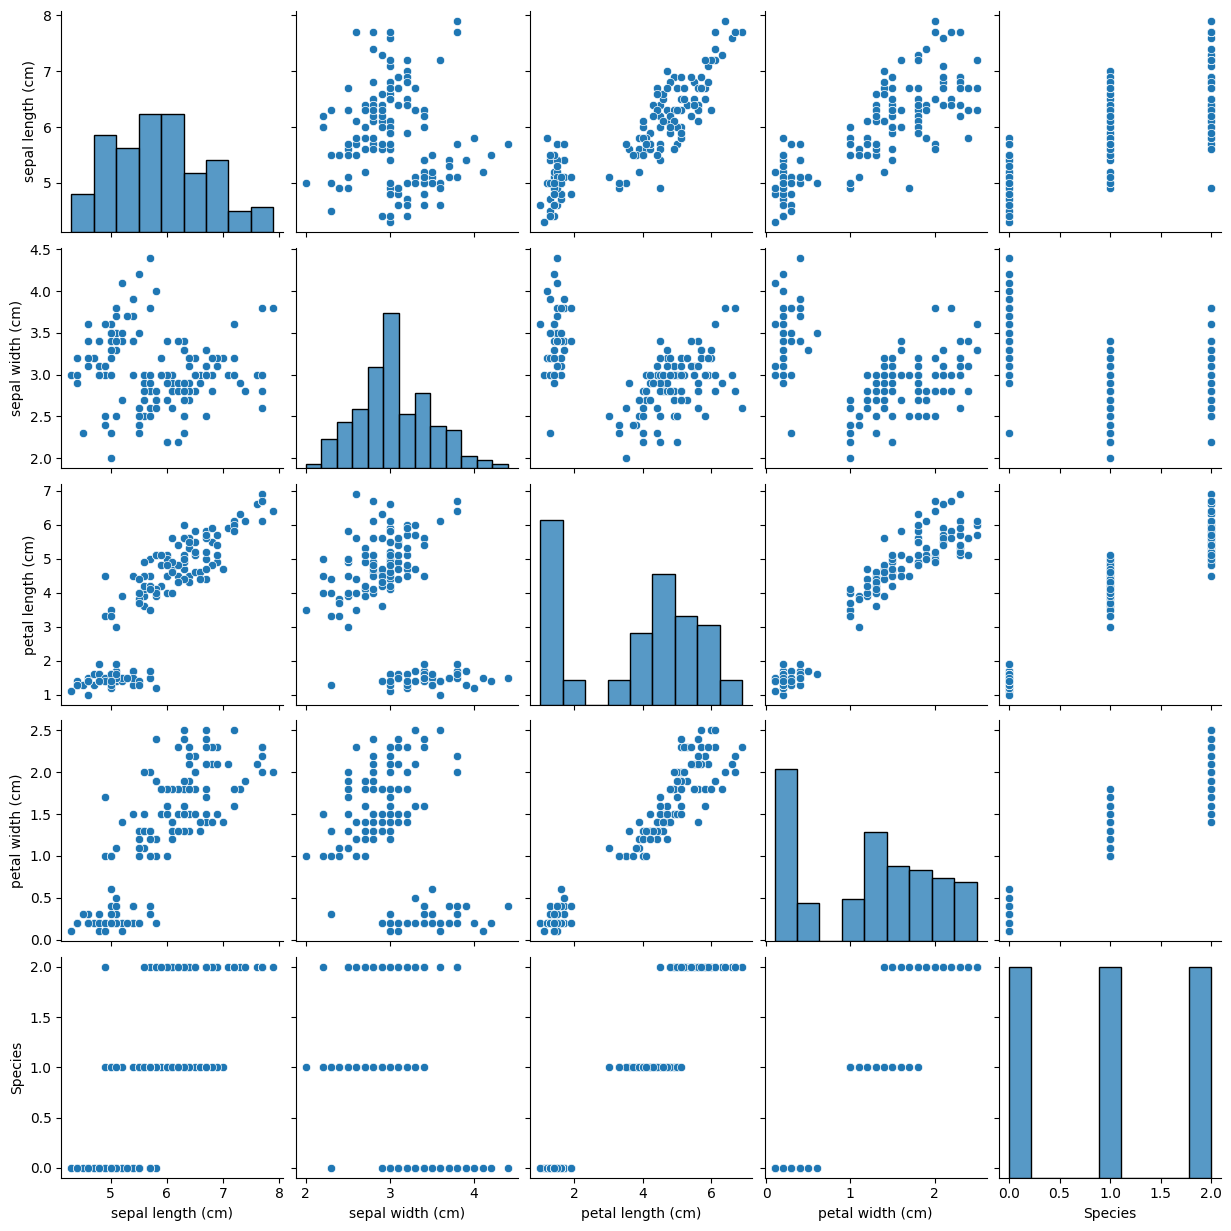

In [6]:
sns.pairplot(df)
plt.show()

### Taking Sapel Length and Petal Width Features

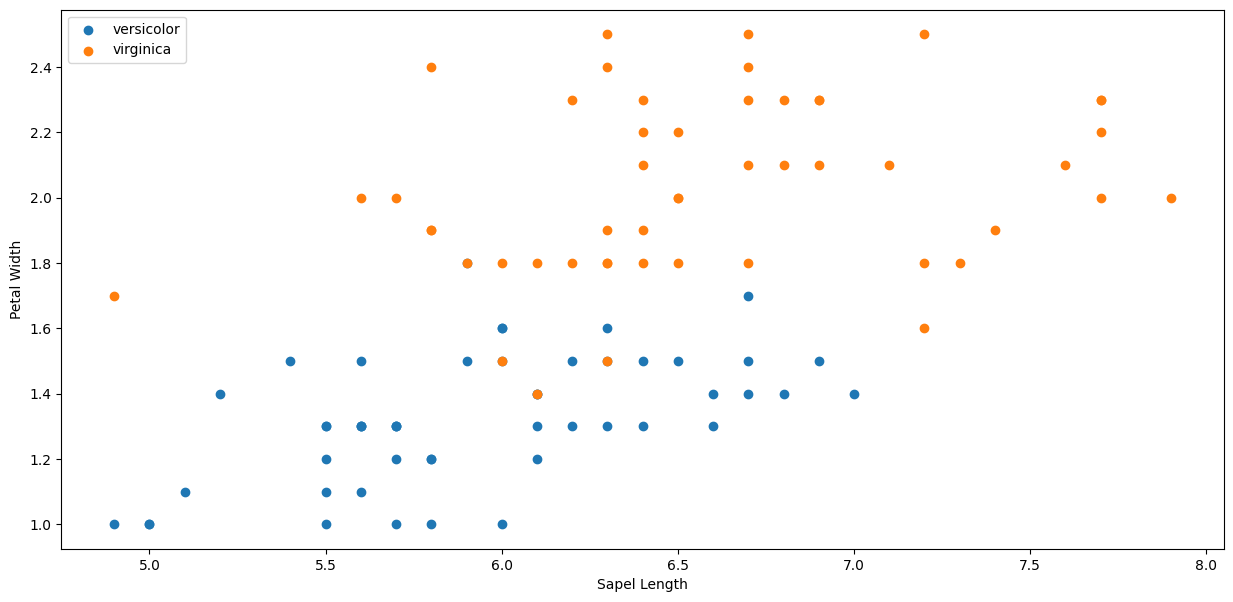

In [25]:
new_df = df[df['Species'] != 0].loc[:, ['sepal length (cm)', 'petal width (cm)', 'Species']]

plt.figure(figsize=(15, 7))
plt.scatter(new_df[new_df['Species'] == 1]['sepal length (cm)'], new_df[new_df['Species'] == 1]['petal width (cm)'], label = "versicolor")
plt.scatter(new_df[new_df['Species'] == 2]['sepal length (cm)'], new_df[new_df['Species'] == 2]['petal width (cm)'], label = 'virginica')

plt.xlabel("Sapel Length")
plt.ylabel("Petal Width")
plt.legend(loc = 'upper left')

plt.show()

### Sampling and Splitting the Data
- training - 0.6 | validation - 0.2 | testing - 0.2

In [28]:
new_df = new_df.sample(100)

df_train = new_df.iloc[:60,:]
df_validation = new_df.iloc[60:80,:]
df_test = new_df.iloc[80:,:]

# **BAGGING ENSEMBLE TYPES**
1. Bagging : Row Samples with replacement

2. Pasting : Row Samples without replacement

3. Random Subspaces : Column Samples

4. Random Patches : Both Row and Column Samples

In [47]:
def evaluate(clf,X_train,X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print("Accuracy : ", accuracy_score(y_test, y_pred))

# **CASE 1 - BAGGING**

In [68]:
df_bag = df_train.sample(40, replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_validation = df_validation.sample(10, replace=True)
X_validation = df_validation[['sepal length (cm)', 'petal width (cm)']].head(10)
y_validation = df_validation['Species'].head(10)

### Decision Tree and Boundry

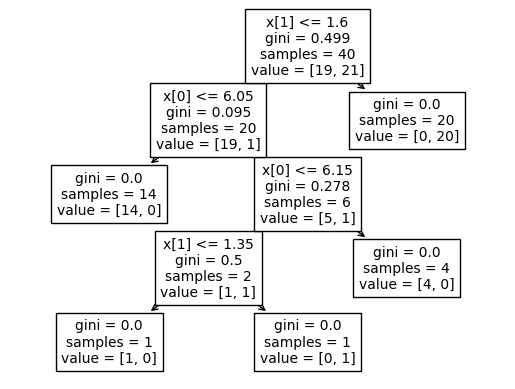

Accuracy :  1.0


c:\Users\shrir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


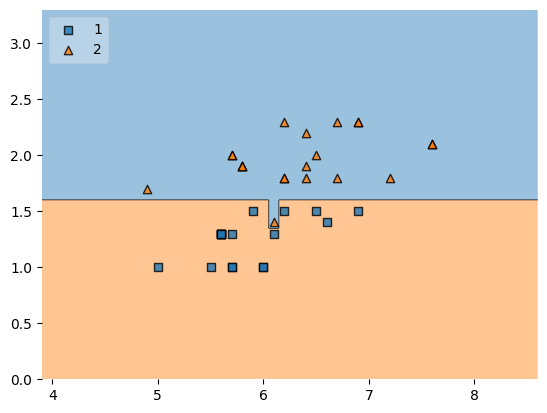

In [69]:
evaluate(
    clf = DecisionTreeClassifier(),
    X_train = X, y_train = y,
    X_test = X_validation, y_test = y_validation
)

# **CASE 2 : PASTING**

In [66]:
df_bag = df_train.sample(40, replace=False)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_validation = df_validation.sample(10)
X_validation = df_validation[['sepal length (cm)', 'petal width (cm)']].head(10)
y_validation = df_validation['Species'].head(10)

### Decision Tree and Boundry

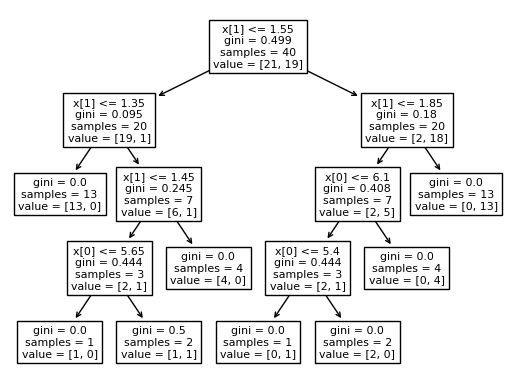

Accuracy :  0.9


c:\Users\shrir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


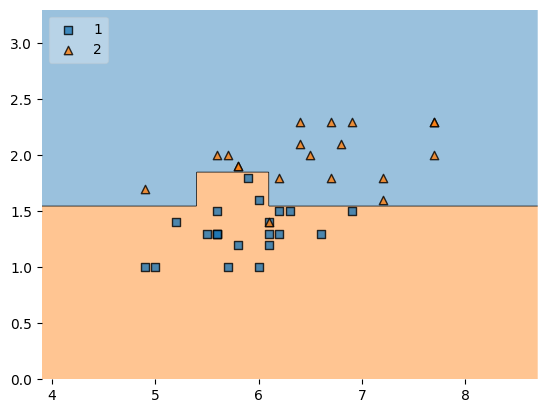

In [67]:
evaluate(
    clf = DecisionTreeClassifier(),
    X_train = X, y_train = y,
    X_test = X_validation, y_test = y_validation
)

# **CASE 3 : RANDOM SUBSPACES**

In [111]:
X = df.iloc[:, 1:5].sample(2, replace = False, axis = 1) # Column Sampling only
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# **CASE 4 : RANDOM PATCHES**

In [113]:
df = df.sample(200, replace=True, axis=0).reset_index() # Row Sampling

X = df.iloc[:, 1:5].sample(2, replace = False, axis = 1) # Column Sampling
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.975

# **BAGGING CLASSIFIER**
- Classification using bagging

In [4]:
X, y = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=3,
    n_classes=3,
    n_clusters_per_class=2
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Accuracy of Training only one Decision Tree

In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.844


### Case 1 : Bagging using Decision Trees

In [12]:
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500, 
    max_samples=0.5, 
    bootstrap=True,
    random_state=42,
    oob_score=True,
    n_jobs=-1,
)

bg.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=10,
                  max_samples=0.5, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [18]:
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average=None))

Accuracy: 0.896
F1_score: [0.89830508 0.89116719 0.89817629]


### Case 2 : Bagging using SVM

In [20]:
bg = BaggingClassifier(
    estimator=SVC(),
    n_estimators=50, 
    max_samples=0.5, 
    bootstrap=True,
    random_state=42,
    oob_score=True,
    n_jobs=-1,
)

bg.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), max_features=10, max_samples=0.5,
                  n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)

In [21]:
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average=None))

Accuracy: 0.8515
F1_score: [0.82748948 0.8609375  0.86862442]


# **oob_score**
- The Out-of-Bag (OOB) score is a performance metric for Random Forest models, specifically ensemble models, which provides an unbiased estimate of the model’s performance on unseen data. It is calculated using the samples that are not used in the training of the model, also known as out-of-bag (OOB) samples.

- It is statically proven that 37% data is not visited while doing sampling multiple times
so oob_score is the accuracy of model's prediction on that unseen data 

In [22]:
bg.oob_score_

0.836625

### Case 3 : Random Patches

In [23]:
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100, 
    max_samples=0.5, 
    bootstrap=True,
    random_state=42,
    max_features=5,
    bootstrap_features=True,
    oob_score=True,
    n_jobs=-1,
)

bg.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=5, max_samples=0.5, n_estimators=100, n_jobs=-1,
                  oob_score=True, random_state=42)

In [24]:
y_pred = bg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred, average=None))

Accuracy: 0.8765
F1_score: [0.87880936 0.86991221 0.88023952]


### Rows used for training

In [33]:
bg.estimators_samples_[0:5]

[array([5011, 4466,  632, ..., 4138,  870, 3686]),
 array([3429, 4330,  515, ..., 7024, 7759,   51]),
 array([2298, 1192, 7356, ..., 1359, 2475, 1397]),
 array([5331,  959, 2422, ..., 6817,  832, 4035]),
 array([4104, 7646, 6243, ..., 7038, 3275, 6833])]

### Columns used for training

In [34]:
bg.estimators_features_[0:5]

[array([9, 2, 9, 7, 7]),
 array([7, 3, 7, 3, 9]),
 array([6, 0, 7, 7, 9]),
 array([0, 5, 7, 4, 1]),
 array([6, 9, 6, 3, 3])]

In [25]:
bg.oob_score_

0.855125

# **HYPERPARAMETER TUNING**

In [28]:
parameters = {
    'n_estimators': [5, 10, 50], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0],
    'bootstrap_features' : [True, False],
}

search =  GridSearchCV(BaggingClassifier(), param_grid=parameters, cv = 5)

search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [5, 10, 50]})

### Best Parameters

In [29]:
search.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 50}

### Cross Validation Score

In [30]:
search.best_score_

0.8842500000000001

# **BAGGING REGRESSOR**
- Regression using Bagging

In [41]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100,
    n_features=5,
    n_informative=4,
    n_targets=1,
    noise=100,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)

R^2 score for LR 0.7453000434823884
R^2 score for DT 0.29606427789406176
R^2 score for KNN 0.3699087523095913


In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

print("R^2 score for LR",r2_score(y_test,y_pred1))
print("R^2 score for DT",r2_score(y_test,y_pred2))
print("R^2 score for KNN",r2_score(y_test,y_pred3))

### Training Model

In [48]:
bag_regressor = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=100,
    bootstrap=True,
    max_samples=0.5,
    bootstrap_features = False,
    random_state=42,
    oob_score=True
)

bag_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=LinearRegression(), max_samples=0.5,
                 n_estimators=100, oob_score=True, random_state=42)

### Model prediction and r2_score

In [49]:
y_pred = bag_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.740172064159535

Use GridSearchCV for tuning hyperparameters